<a href="https://colab.research.google.com/github/matyi101/price_catcher/blob/main/Price_Catcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
path = "/content/drive/MyDrive/Colab Notebooks/price_catcher/"

from google.colab import data_table
data_table.enable_dataframe_formatter()

Mounted at /content/drive/


In [47]:
import os
import pandas as pd
import glob

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams["figure.dpi"] = 160
plt.rcParams["axes.grid"] = True

In [3]:
premise = pd.read_csv('https://storage.googleapis.com/dosm-public-pricecatcher/lookup_premise.csv')
premise = premise.dropna()
premise.head()

,premise_code,premise,address,premise_type,state,district
1,2,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
2,3,JUSCO AYER KEROH,"LOT 4991,MUKIM BUKIT BARU,75450 LEBUH AYER KER...",Pasar Raya / Supermarket,Melaka,Melaka Tengah
3,6,KEDAI RUNCIT TAFAZ MAJU PRESINT 9,"NO.5, JALAN P9B/1,PRESINT 9,62250 PUTRAJAYA",Kedai Runcit,W.P. Putrajaya,Wp Putrajaya
4,7,KEDAI RUNCIT SYAZ MAJU PRESINT 9,"NO.5, JALAN P9E/1,PRESINT 9,62250 PUTRAJAYA",Kedai Runcit,W.P. Putrajaya,Wp Putrajaya
5,8,PASAR MINI D'MART PRESINT 8,"BLOK A T00/U01,JALAN P8/D,PRESINT 8, 62000 PUT...",Pasar Mini,W.P. Putrajaya,Wp Putrajaya


In [4]:
items = pd.read_csv('https://storage.googleapis.com/dosm-public-pricecatcher/lookup_item.csv')
items = items.dropna()
items.head()

,item_code,item,unit,item_group,item_category
1,1,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
2,2,AYAM BERSIH - SUPER,1kg,BARANGAN SEGAR,AYAM
3,3,AYAM HIDUP,1kg,BARANGAN SEGAR,AYAM
4,9,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING
5,10,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING


In [5]:
# Define the directory path where the data are located
directory_path = "/content/drive/MyDrive/Colab Notebooks/price_catcher/data/"

# Use glob to get a list of file names that match a pattern
file_names = glob.glob(directory_path + "*.csv")

# Create an empty list to store the data frames
data_frames = []

# Loop through the file names and read each file as a data frame
for file in file_names:
    # Read the file using pandas read_csv function
    df = pd.read_csv(file)
    # Append the data frame to the list
    data_frames.append(df)

# Use pandas concat function to combine the data frames into one
df = pd.concat(data_frames, ignore_index=True)
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,premise_code,item_code,price
0,2022-01-01,2,1,9.1
1,2022-01-01,2,9,36.0
2,2022-01-01,2,14,24.0
3,2022-01-01,2,16,4.3
4,2022-01-01,2,18,4.5


In [6]:
combine = df.merge(premise, on="premise_code", how="left")
combine.head()

,date,premise_code,item_code,price,premise,address,premise_type,state,district
0,2022-01-01,2,1,9.1,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
1,2022-01-01,2,9,36.0,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
2,2022-01-01,2,14,24.0,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
3,2022-01-01,2,16,4.3,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
4,2022-01-01,2,18,4.5,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta


In [7]:
df_combine = combine.merge(items, on="item_code", how="left")
df_combine

,date,premise_code,item_code,price,premise,address,premise_type,state,district,item,unit,item_group,item_category
0,2022-01-01,2,1,9.10,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
1,2022-01-01,2,9,36.00,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING
2,2022-01-01,2,14,24.00,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),1kg,BARANGAN SEGAR,DAGING
3,2022-01-01,2,16,4.30,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,BETIK BIASA,1kg,BARANGAN SEGAR,BUAH-BUAHAN
4,2022-01-01,2,18,4.50,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,PISANG BERANGAN,1kg,BARANGAN SEGAR,BUAH-BUAHAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27403978,2022-12-31,20861,1926,15.90,STAR GROCER SDN BHD,"NO 2, JALAN 20/16 PARAMOUNT GARDEN,46300 PETAL...",Pasar Raya / Supermarket,Selangor,Petaling Jaya,CILI AKAR HIJAU,1kg,BARANGAN SEGAR,SAYUR-SAYURAN
27403979,2022-12-31,20861,1928,7.50,STAR GROCER SDN BHD,"NO 2, JALAN 20/16 PARAMOUNT GARDEN,46300 PETAL...",Pasar Raya / Supermarket,Selangor,Petaling Jaya,LIMAU KASTURI,1kg,BARANGAN SEGAR,SAYUR-SAYURAN
27403980,2022-12-31,20861,1930,7.50,STAR GROCER SDN BHD,"NO 2, JALAN 20/16 PARAMOUNT GARDEN,46300 PETAL...",Pasar Raya / Supermarket,Selangor,Petaling Jaya,TELUR AYAM KAMPUNG,10 biji,BARANGAN SEGAR,TELUR
27403981,2022-12-31,20861,1943,14.60,STAR GROCER SDN BHD,"NO 2, JALAN 20/16 PARAMOUNT GARDEN,46300 PETAL...",Pasar Raya / Supermarket,Selangor,Petaling Jaya,KACANG MERAH (IMPORT),1kg,BARANGAN KERING,KACANG


In [8]:
df_reconstructed = df_combine[["date", "premise_type", "district","state","item_category","item","price"]]
df_reconstructed.head()

,date,premise_type,district,state,item_category,item,price
0,2022-01-01,Pasar Basah,Kinta,Perak,AYAM,AYAM BERSIH - STANDARD,9.1
1,2022-01-01,Pasar Basah,Kinta,Perak,DAGING,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,36.0
2,2022-01-01,Pasar Basah,Kinta,Perak,DAGING,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),24.0
3,2022-01-01,Pasar Basah,Kinta,Perak,BUAH-BUAHAN,BETIK BIASA,4.3
4,2022-01-01,Pasar Basah,Kinta,Perak,BUAH-BUAHAN,PISANG BERANGAN,4.5


In [9]:
# Only interested in Selangor data
df = df_reconstructed[df_reconstructed["state"]=="Selangor"]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898270 entries, 2195 to 27403982
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   premise_type   object        
 2   district       object        
 3   state          object        
 4   item_category  object        
 5   item           object        
 6   price          float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 176.9+ MB


,date,premise_type,district,state,item_category,item,price
2195,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,AYAM,AYAM BERSIH - STANDARD,8.95
2196,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,BETIK BIASA,3.95
2197,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,TEMBIKAI MERAH TANPA BIJI,2.29
2198,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,TEMBIKAI SUSU,5.45
2199,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,NENAS BIASA (JOSAPINE/MORRIS/SARAWAK),2.35


In [10]:
df_group = df.groupby("item_category")
df_group.head()

,date,premise_type,district,state,item_category,item,price
2195,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,AYAM,AYAM BERSIH - STANDARD,8.95
2196,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,BETIK BIASA,3.95
2197,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,TEMBIKAI MERAH TANPA BIJI,2.29
2198,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,TEMBIKAI SUSU,5.45
2199,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,NENAS BIASA (JOSAPINE/MORRIS/SARAWAK),2.35
...,...,...,...,...,...,...,...
501806,2022-01-05,Restoran India Muslim,Petaling Jaya,Selangor,MEE / BIHUN / KUEY TEOW,MI GORENG BIASA,5.50
501807,2022-01-05,Restoran India Muslim,Petaling Jaya,Selangor,MEE / BIHUN / KUEY TEOW,MI GORENG MAMAK,5.00
531364,2022-01-05,Medan Selera,Petaling Jaya,Selangor,MEE / BIHUN / KUEY TEOW,BIHUN GORENG,5.00
531365,2022-01-05,Medan Selera,Petaling Jaya,Selangor,MEE / BIHUN / KUEY TEOW,BIHUN HAILAM,6.00


In [11]:
daging = df[df["item_category"]=="DAGING"]
daging

,date,premise_type,district,state,item_category,item,price
2308,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,DAGING,DAGING LEMBU IMPORT (BLADE),35.00
2309,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,DAGING,DAGING KERBAU IMPORT (INDIA) * (SILVERSIDE),17.00
2310,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,DAGING,DAGING KERBAU IMPORT (INDIA) * (BLADE),17.00
3255,2022-01-01,Hypermarket,Petaling,Selangor,DAGING,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,35.99
3383,2022-01-01,Hypermarket,Petaling,Selangor,DAGING,DAGING PAHA KAMBING BEBIRI IMPORT BERTULANG (...,37.99
...,...,...,...,...,...,...,...
27397840,2022-12-31,Pasar Raya / Supermarket,Hulu Selangor,Selangor,DAGING,DAGING KERBAU IMPORT (INDIA) (BLOCK),20.90
27401825,2022-12-31,Pasar Raya / Supermarket,Petaling,Selangor,DAGING,DAGING KAMBING BEBIRI IMPORT TANPA TULANG (MUT...,46.90
27401826,2022-12-31,Pasar Raya / Supermarket,Petaling,Selangor,DAGING,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),18.50
27401861,2022-12-31,Pasar Raya / Supermarket,Petaling,Selangor,DAGING,DAGING PAHA KAMBING BEBIRI IMPORT BERTULANG (...,36.90


In [12]:
daging.groupby("item").count()

,date,premise_type,district,state,item_category,price
item,,,,,,
DAGING BABI (DAGING & LEMAK / LEAN & FAT),4164,4164,4164,4164,4164,4164
DAGING BABI (ISI DAGING / PURE LEAN),4158,4158,4158,4158,4158,4158
DAGING BABI (PERUT / BELLY),4077,4077,4077,4077,4077,4077
DAGING BABI (RUSUK DENGAN DAGING/ RIBS WITH MEAT),4355,4355,4355,4355,4355,4355
DAGING KAMBING BEBIRI IMPORT BERTULANG (LAMB) (AUSTRALIA - KOTAK) (1KG),482,482,482,482,482,482
DAGING KAMBING BEBIRI IMPORT BERTULANG (LAMB) (NEW ZEALAND - KOTAK),26,26,26,26,26,26
DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON) (AUSTRALIA - KOTAK),7709,7709,7709,7709,7709,7709
DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON) (NEW ZEALAND - KOTAK),122,122,122,122,122,122
DAGING KAMBING BEBIRI IMPORT TANPA TULANG (LAMB) (TIDAK TERMASUK PAHA - AUSTRALIA),74,74,74,74,74,74


In [13]:
# Interested only with Cat: DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL (KECUALI BATANG PINANG - TENDERLOIN)
daging_lembu = df[df["item"].str.contains("BAHAGIAN 2", na=False)]
daging_lembu

,date,premise_type,district,state,item_category,item,price
45272,2022-01-01,Hypermarket,Petaling,Selangor,DAGING,DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL...,45.9
47669,2022-01-01,Pasar Basah,Gombak,Selangor,DAGING,DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL...,38.0
49884,2022-01-01,Pasar Basah,Petaling Jaya,Selangor,DAGING,DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL...,30.0
54406,2022-01-01,Pasar Basah,Petaling,Selangor,DAGING,DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL...,40.0
54869,2022-01-01,Pasar Basah,Rawang,Selangor,DAGING,DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL...,34.0
...,...,...,...,...,...,...,...
27373570,2022-12-31,Hypermarket,Petaling,Selangor,DAGING,DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL...,45.9
27392756,2022-12-31,Pasar Raya / Supermarket,Hulu Langat,Selangor,DAGING,DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL...,41.9
27394297,2022-12-31,Pasar Raya / Supermarket,Gombak,Selangor,DAGING,DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL...,41.9
27397732,2022-12-31,Pasar Raya / Supermarket,Hulu Selangor,Selangor,DAGING,DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL...,45.0


(array([18993., 19052., 19113., 19174., 19236., 19297., 19358.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01')])

<Figure size 2000x400 with 0 Axes>

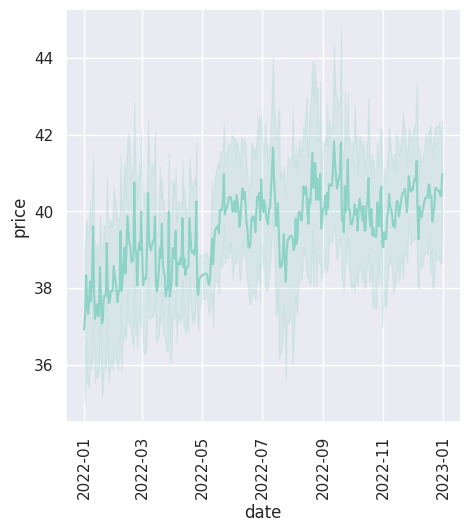

In [38]:
# Setting Plot size and font style:
sns.set_style("darkgrid")
sns.set_palette("Set3")
plt.figure(figsize=(20, 4))
sns.relplot(x='date', y='price', data=daging_lembu, kind='line')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Petaling'),
  Text(1, 0, 'Gombak'),
  Text(2, 0, 'Petaling Jaya'),
  Text(3, 0, 'Rawang'),
  Text(4, 0, 'Hulu Langat'),
  Text(5, 0, 'Kuala Langat'),
  Text(6, 0, 'Sepang'),
  Text(7, 0, 'Klang'),
  Text(8, 0, 'Hulu Selangor')])

<Figure size 1440x960 with 0 Axes>

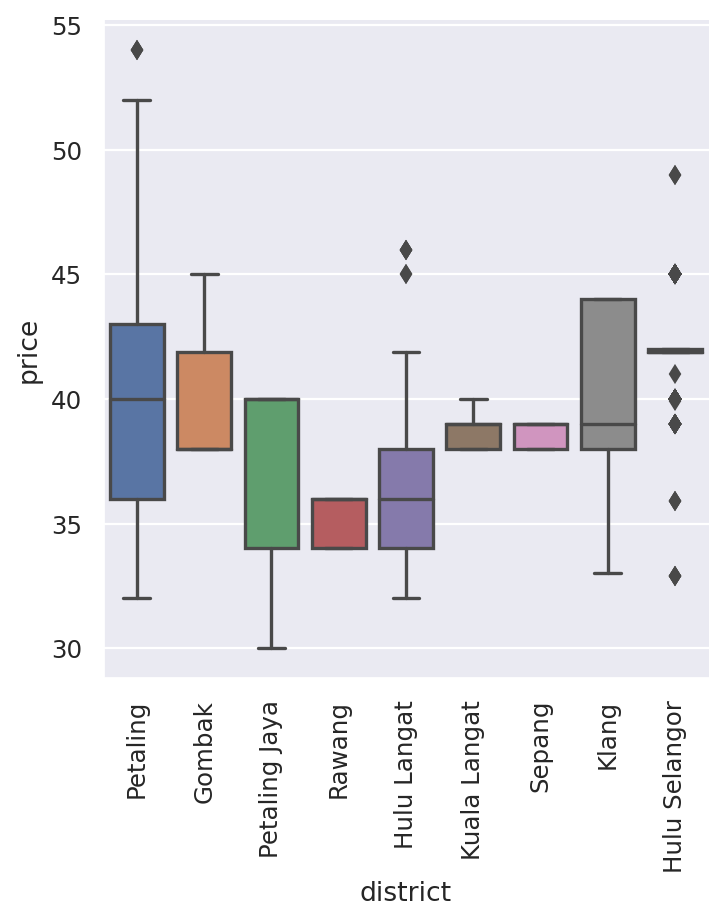

In [56]:
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.catplot(x="district", y="price", kind="box", data=daging_lembu)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Petaling'),
  Text(1, 0, 'Gombak'),
  Text(2, 0, 'Petaling Jaya'),
  Text(3, 0, 'Rawang'),
  Text(4, 0, 'Hulu Langat'),
  Text(5, 0, 'Kuala Langat'),
  Text(6, 0, 'Sepang'),
  Text(7, 0, 'Klang'),
  Text(8, 0, 'Hulu Selangor')])

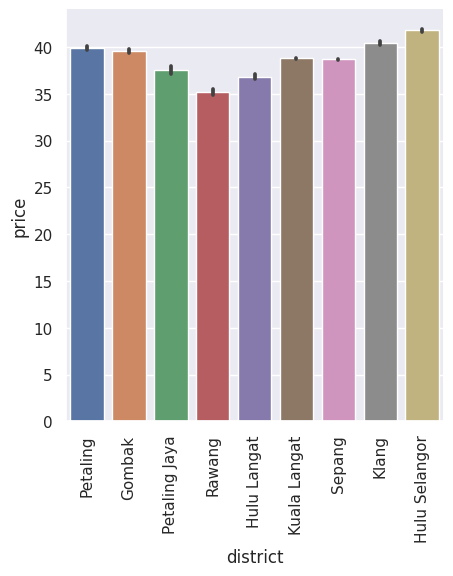

In [15]:
sns.catplot(x="district", y="price", data=daging_lembu, kind="bar")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Hypermarket'),
  Text(1, 0, 'Pasar Basah '),
  Text(2, 0, 'Borong'),
  Text(3, 0, 'Pasar Raya / Supermarket')])

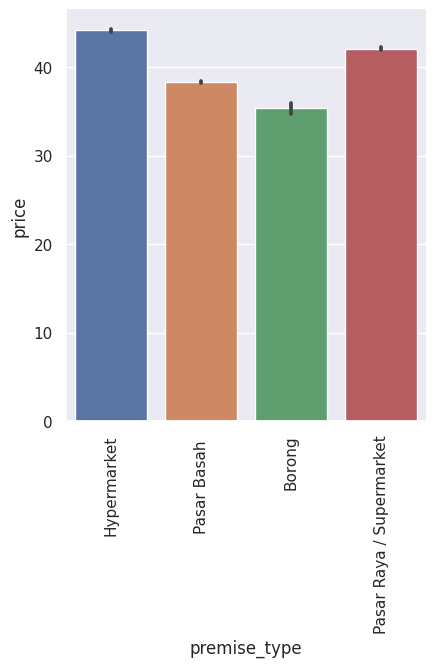

In [16]:
sns.catplot(x="premise_type", y="price", data=daging_lembu, kind="bar")
plt.xticks(rotation=90)

In [17]:
df.head()


,date,premise_type,district,state,item_category,item,price
2195,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,AYAM,AYAM BERSIH - STANDARD,8.95
2196,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,BETIK BIASA,3.95
2197,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,TEMBIKAI MERAH TANPA BIJI,2.29
2198,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,TEMBIKAI SUSU,5.45
2199,2022-01-01,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,NENAS BIASA (JOSAPINE/MORRIS/SARAWAK),2.35


In [18]:
# Import scikit-learn
from sklearn.ensemble import IsolationForest
from sklearn.covariance import MinCovDet
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [49]:
# Convert the date column to numeric values
df.loc[:, "date"] = pd.to_datetime(df["date"]).astype(int)

# Define the features to use for outlier detection
X = df[["price", "date"]]

# Create an Isolation Forest model and fit the data
iso = IsolationForest(random_state=0)
iso.fit(X)

# Predict the outlier labels (-1 for outliers, 1 for normal points)
df["iso_label"] = iso.predict(X)

# Filter out the outliers based on the labels
df_no_outliers = df[df["iso_label"] == 1]

# Print the filtered data
print(df_no_outliers)

<ipython-input-49-718334619484>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "date"] = pd.to_datetime(df["date"]).astype(int)
<ipython-input-49-718334619484>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["iso_label"] = iso.predict(X)


                         date              premise_type       district  \
1480131   1642550400000000000  Pasar Raya / Supermarket          Klang   
1480719   1642550400000000000               Hypermarket       Petaling   
1482574   1642550400000000000  Pasar Raya / Supermarket  Petaling Jaya   
1483964   1642550400000000000               Hypermarket          Klang   
1488574   1642550400000000000               Hypermarket       Petaling   
...                       ...                       ...            ...   
26244360  1671148800000000000  Pasar Raya / Supermarket  Petaling Jaya   
26249303  1671148800000000000  Pasar Raya / Supermarket         Sepang   
26249323  1671148800000000000  Pasar Raya / Supermarket         Sepang   
26250888  1671148800000000000  Pasar Raya / Supermarket  Petaling Jaya   
26250976  1671148800000000000  Pasar Raya / Supermarket  Petaling Jaya   

             state      item_category                  item  price  iso_label  
1480131   Selangor      SAYUR-S

In [50]:
df_no_outliers

,date,premise_type,district,state,item_category,item,price,iso_label
1480131,1642550400000000000,Pasar Raya / Supermarket,Klang,Selangor,SAYUR-SAYURAN,TOMATO,5.39,1
1480719,1642550400000000000,Hypermarket,Petaling,Selangor,SAYUR-SAYURAN,TOMATO,5.40,1
1482574,1642550400000000000,Pasar Raya / Supermarket,Petaling Jaya,Selangor,TELUR,TELUR MASIN,5.24,1
1483964,1642550400000000000,Hypermarket,Klang,Selangor,SAYUR-SAYURAN,TOMATO,5.40,1
1488574,1642550400000000000,Hypermarket,Petaling,Selangor,SAYUR-SAYURAN,BAYAM HIJAU,5.38,1
...,...,...,...,...,...,...,...,...
26244360,1671148800000000000,Pasar Raya / Supermarket,Petaling Jaya,Selangor,TELUR,TELUR AYAM KAMPUNG,7.00,1
26249303,1671148800000000000,Pasar Raya / Supermarket,Sepang,Selangor,HASIL LAUT KERING,UDANG KERING,7.00,1
26249323,1671148800000000000,Pasar Raya / Supermarket,Sepang,Selangor,KACANG,KACANG SOYA (IMPORT),7.00,1
26250888,1671148800000000000,Pasar Raya / Supermarket,Petaling Jaya,Selangor,BUAH-BUAHAN,PISANG BERANGAN,7.20,1


In [52]:
df_no_outliers= df_no_outliers[df_no_outliers["item_category"]=="DAGING"]
df_no_outliers

,date,premise_type,district,state,item_category,item,price,iso_label
